## Overfitting and Underfitting
To illustrate underfitting and overfitting using the clean_auto.csv dataset, we can use polynomial regression with different degrees of polynomial features. 

We'll fit a simple linear regression model (underfitting) and a high-degree polynomial regression model (overfitting), then compare them to a well-tuned model.

STEPS

-Load and preprocess the data.

-Split the data into training and test sets.

-Fit and evaluate a linear regression model (underfitting).

-Fit and evaluate a high-degree polynomial regression model (overfitting).

-Fit and evaluate a properly tuned polynomial regression model.

-Visualize the results.

In [4]:
#Loading library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
#Loading and Preprocess the Data
import pandas as pd

# Load the data
data = pd.read_csv('clean_auto.csv')

# Display the first few rows
data.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower_binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,168.8,...,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,168.8,...,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,171.2,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,3,2,164,audi,four,sedan,fwd,front,99.8,176.6,...,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
4,4,2,164,audi,four,sedan,4wd,front,99.4,176.6,...,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0


#### Underfitting

Underfitting occurs when a machine learning model is too simple to capture the underlying patterns in the data. This leads to poor performance on both the training set and the validation/test set.

Essentially, the model fails to learn the relationships between the input features and the target variable.

Causes of Underfitting:
    
Model Complexity: The model is too simple. For instance, using a linear model for data that has a non-linear relationship.
                                                                             
Insufficient Training: The model hasn't been trained for enough epochs or iterations.
                                                                             
Inadequate Features: Important features may be missing, or the features are not informative enough.
                                                                             
High Regularization: Excessive regularization can constrain the model too much, preventing it from fitting the training data.
                                                                             
Indicators of Underfitting:
                                                                             
High training error: The model performs poorly on the training data.
High validation/test error: The model also performs poorly on new, unseen data.
Both training and validation errors are similar and high.

##### Addressing Underfitting:

Increase Model Complexity:

Use a more complex model (e.g., moving from linear regression to polynomial regression or a neural network).
Add more layers or neurons in a neural network.
Feature Engineering:

Add more relevant features.

Transform existing features to better capture the relationships in the data.

Reduce Regularization:

Decrease the regularization parameter in models like Ridge, Lasso, or neural networks.

Increase Training Time:

Train the model for more epochs or iterations.

Hyperparameter Tuning:

Optimize hyperparameters to better fit the training data.

#### Overfitting                                                                             
Overfitting occurs when a machine learning model learns not only the underlying patterns in the training data but also the noise and details that do not generalize to new, unseen data. This results in excellent performance on the training data but poor performance on the validation/test data.

Causes of Overfitting:

Model Complexity: The model is too complex for the amount of training data available. For instance, using a very deep neural network or a high-degree polynomial regression on a small dataset.

Insufficient Training Data: Not enough data points to generalize the patterns.

Excessive Training: Training the model for too many epochs or iterations, allowing it to memorize the training data.

Feature Set: Including too many irrelevant features can cause the model to learn noise.

Indicators of Overfitting:

Low Training Error: The model performs extremely well on the training data.

High Validation/Test Error: The model performs poorly on new, unseen data.

High Variance: The model’s performance varies significantly between the training set and the validation/test set.

##### Addressing Overfitting:

Simplify the Model:

Use a less complex model (e.g., reduce the number of layers in a neural network or the degree of a polynomial).
Prune decision trees to remove branches that have little importance.

Regularization:

Apply regularization techniques such as L1 (Lasso) or L2 (Ridge) regularization.
Use dropout in neural networks to randomly drop units during training.

Increase Training Data:

Collect more training data to help the model generalize better.

Use data augmentation techniques to artificially increase the size of the training set.

Cross-Validation:

Use k-fold cross-validation to ensure the model generalizes well across different subsets of the data.

Early Stopping:

Monitor the model’s performance on the validation set during training and stop training once the performance starts to degrade.

Reduce Features:

Perform feature selection to remove irrelevant or redundant features.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Separate features and target variable
X = data.drop(columns=['price'])
y = data['price']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data: impute missing values and scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data: impute missing values and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=0))
])

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

(train_mse, train_r2, val_mse, val_r2)

(597607.1410937499, 0.9898915434403494, 4537620.908804878, 0.9401134561117468)

##### Fit and Evaluate a Linear Regression Model (Underfitting)

In [12]:
# Identify categorical features
categorical_features = data.select_dtypes(include=['object']).columns

# Identify numerical features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns.drop('price')

# Preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Split the data
X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [11]:
# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = mse_linear ** 0.5
r2_linear = r2_score(y_test, y_pred_linear)

(mae_linear, mse_linear, rmse_linear, r2_linear)

(178214142863729.4,
 1.3021715093543445e+30,
 1141127297611596.2,
 -1.0643284465494348e+22)

#### Fit and Evaluate a High-Degree Polynomial Regression Model (Overfitting)

In [10]:
# Transform features to polynomial features
poly_features_moderate = PolynomialFeatures(degree=2)
X_train_poly_moderate = poly_features_moderate.fit_transform(X_train)
X_test_poly_moderate = poly_features_moderate.transform(X_test)

# Fit a polynomial regression model
poly_model_moderate = LinearRegression()
poly_model_moderate.fit(X_train_poly_moderate, y_train)

# Predict on the test set
y_pred_poly_moderate = poly_model_moderate.predict(X_test_poly_moderate)

# Evaluate the model
mae_poly_moderate = mean_absolute_error(y_test, y_pred_poly_moderate)
mse_poly_moderate = mean_squared_error(y_test, y_pred_poly_moderate)
rmse_poly_moderate = mse_poly_moderate ** 0.5
r2_poly_moderate = r2_score(y_test, y_pred_poly_moderate)

(mae_poly_moderate, mse_poly_moderate, rmse_poly_moderate, r2_poly_moderate)

(9717.976021559421, 186959893.33340454, 13673.32780757503, -0.5281146255246674)

#### Fit and Evaluate a Well-Tuned Polynomial Regression Model

In [11]:
# Transform features to polynomial features with a lower degree
poly_features_optimal = PolynomialFeatures(degree=3)
X_train_poly_optimal = poly_features_optimal.fit_transform(X_train)
X_test_poly_optimal = poly_features_optimal.transform(X_test)

# Fit a polynomial regression model
poly_model_optimal = LinearRegression()
poly_model_optimal.fit(X_train_poly_optimal, y_train)

# Predict on the test set
y_pred_poly_optimal = poly_model_optimal.predict(X_test_poly_optimal)

# Evaluate the model
mae_poly_optimal = mean_absolute_error(y_test, y_pred_poly_optimal)
mse_poly_optimal = mean_squared_error(y_test, y_pred_poly_optimal)
rmse_poly_optimal = mse_poly_optimal ** 0.5
r2_poly_optimal = r2_score(y_test, y_pred_poly_optimal)

(mae_poly_optimal, mse_poly_optimal, rmse_poly_optimal, r2_poly_optimal)


(9400.731783691785, 293742506.8463369, 17138.91790184949, -1.4009011389929271)

#### Visualize the Results

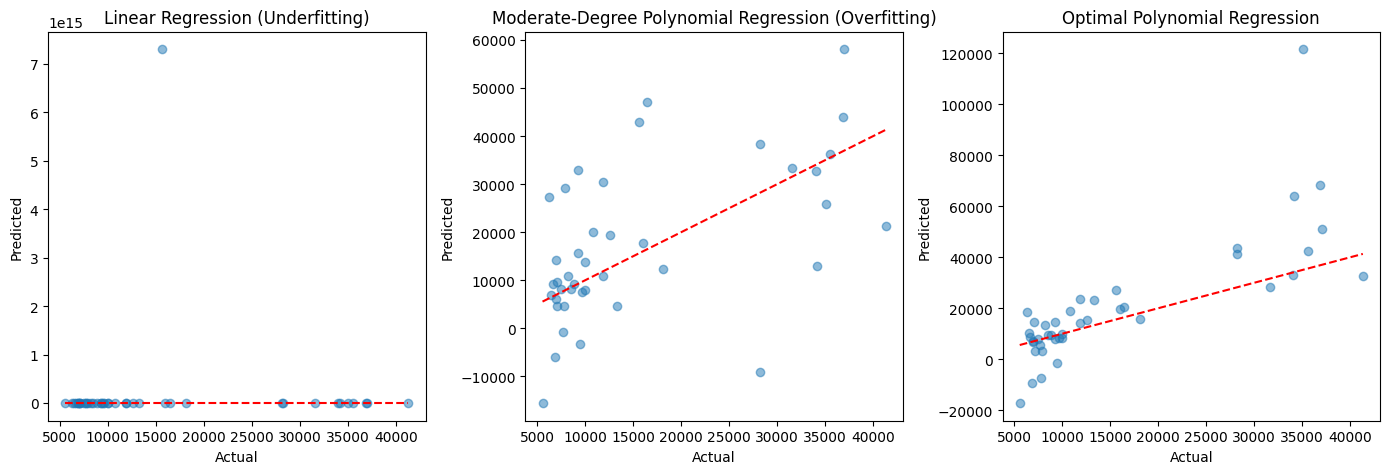

In [12]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.figure(figsize=(14, 5))

# Linear Regression (Underfitting)
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Linear Regression (Underfitting)')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Moderate-Degree Polynomial Regression (Overfitting)
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_poly_moderate, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Moderate-Degree Polynomial Regression (Overfitting)')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Optimal Polynomial Regression
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_poly_optimal, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Optimal Polynomial Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

#### Summary of Metrics

In [13]:
print("Linear Regression (Underfitting)")
print(f"MAE: {mae_linear}")
print(f"MSE: {mse_linear}")
print(f"RMSE: {rmse_linear}")
print(f"R²: {r2_linear}")

print("\nModerate-Degree Polynomial Regression (Overfitting)")
print(f"MAE: {mae_poly_moderate}")
print(f"MSE: {mse_poly_moderate}")
print(f"RMSE: {rmse_poly_moderate}")
print(f"R²: {r2_poly_moderate}")

print("\nOptimal Polynomial Regression")
print(f"MAE: {mae_poly_optimal}")
print(f"MSE: {mse_poly_optimal}")
print(f"RMSE: {rmse_poly_optimal}")
print(f"R²: {r2_poly_optimal}")

Linear Regression (Underfitting)
MAE: 178214142863729.4
MSE: 1.3021715093543445e+30
RMSE: 1141127297611596.2
R²: -1.0643284465494348e+22

Moderate-Degree Polynomial Regression (Overfitting)
MAE: 9717.976021559421
MSE: 186959893.33340454
RMSE: 13673.32780757503
R²: -0.5281146255246674

Optimal Polynomial Regression
MAE: 9400.731783691785
MSE: 293742506.8463369
RMSE: 17138.91790184949
R²: -1.4009011389929271
